# Experiment Understanding
Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.
# Questions:
**How was the experiment conducted? Did every customer get the offers at the same times? Did they get the same tyoe of offers? Can we fairly compare customer behaviors before and after they got the offers?**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
plt.style.use('seaborn-dark')

In [2]:
# read in the cleaned datasets
offers = pd.read_csv('cleaned_data/offers.csv')
customers = pd.read_csv('cleaned_data/customers.csv')
events = pd.read_csv('cleaned_data/events.csv')
print(f'offers has {len(offers)} rows')
print(f'customers has {len(customers)} rows')
print(f'events has {len(events)} rows')

offers has 10 rows
customers has 16994 rows
events has 306514 rows


### The visual below shows that:
- Starbucks sent out first offers in 6 different phases
- Most customers got their first offers in phase one - 0 hours from the experiment

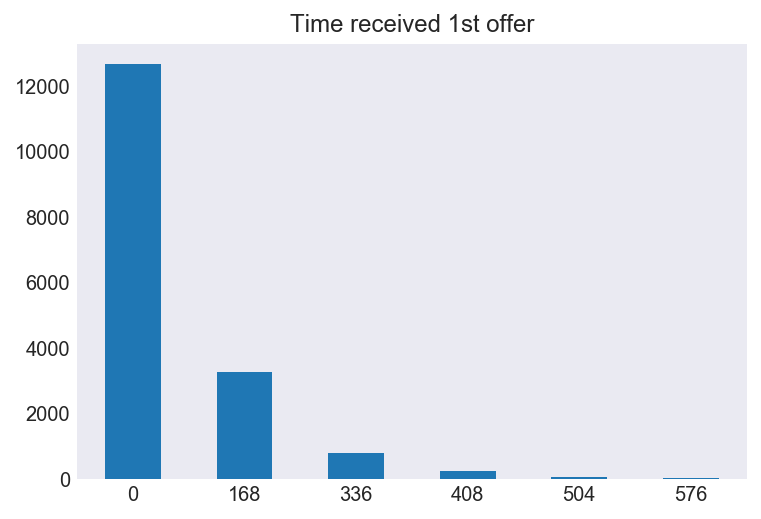

In [3]:
# Group by the minimum hours from test by customer_id
# The hour each customer received his/her first offer
phases = events.query("event == 'offer received'").groupby('customer_id').hour.min().to_frame().rename({'hour':'first_offer_hour'},axis=1).reset_index()

# Plot the count of 6 different hours (phases)
phases.first_offer_hour.value_counts().plot(kind='bar');
plt.xticks(rotation=360);
plt.title('Time received 1st offer');

In [4]:
def get_phase_ids(hour):
    '''
    INPUT:
        hour - hours after experiment to receive the first offer (0,168,336,408,504,576)
    OUTPUT:
        ids - list of customer ids who got their first offers at this hour
    '''
    ids = list(phases[phases.first_offer_hour == hour].customer_id)
    return ids
    
time_of_phases = [0,168,336,408,504,576]


def create_pre_post_events(phase):

    df = events[events.customer_id.isin(get_phase_ids(phase))]
    pre_offer_events = df[df.hour < phase]
    post_offer_events = df[df.hour >= phase]

    return pre_offer_events, post_offer_events

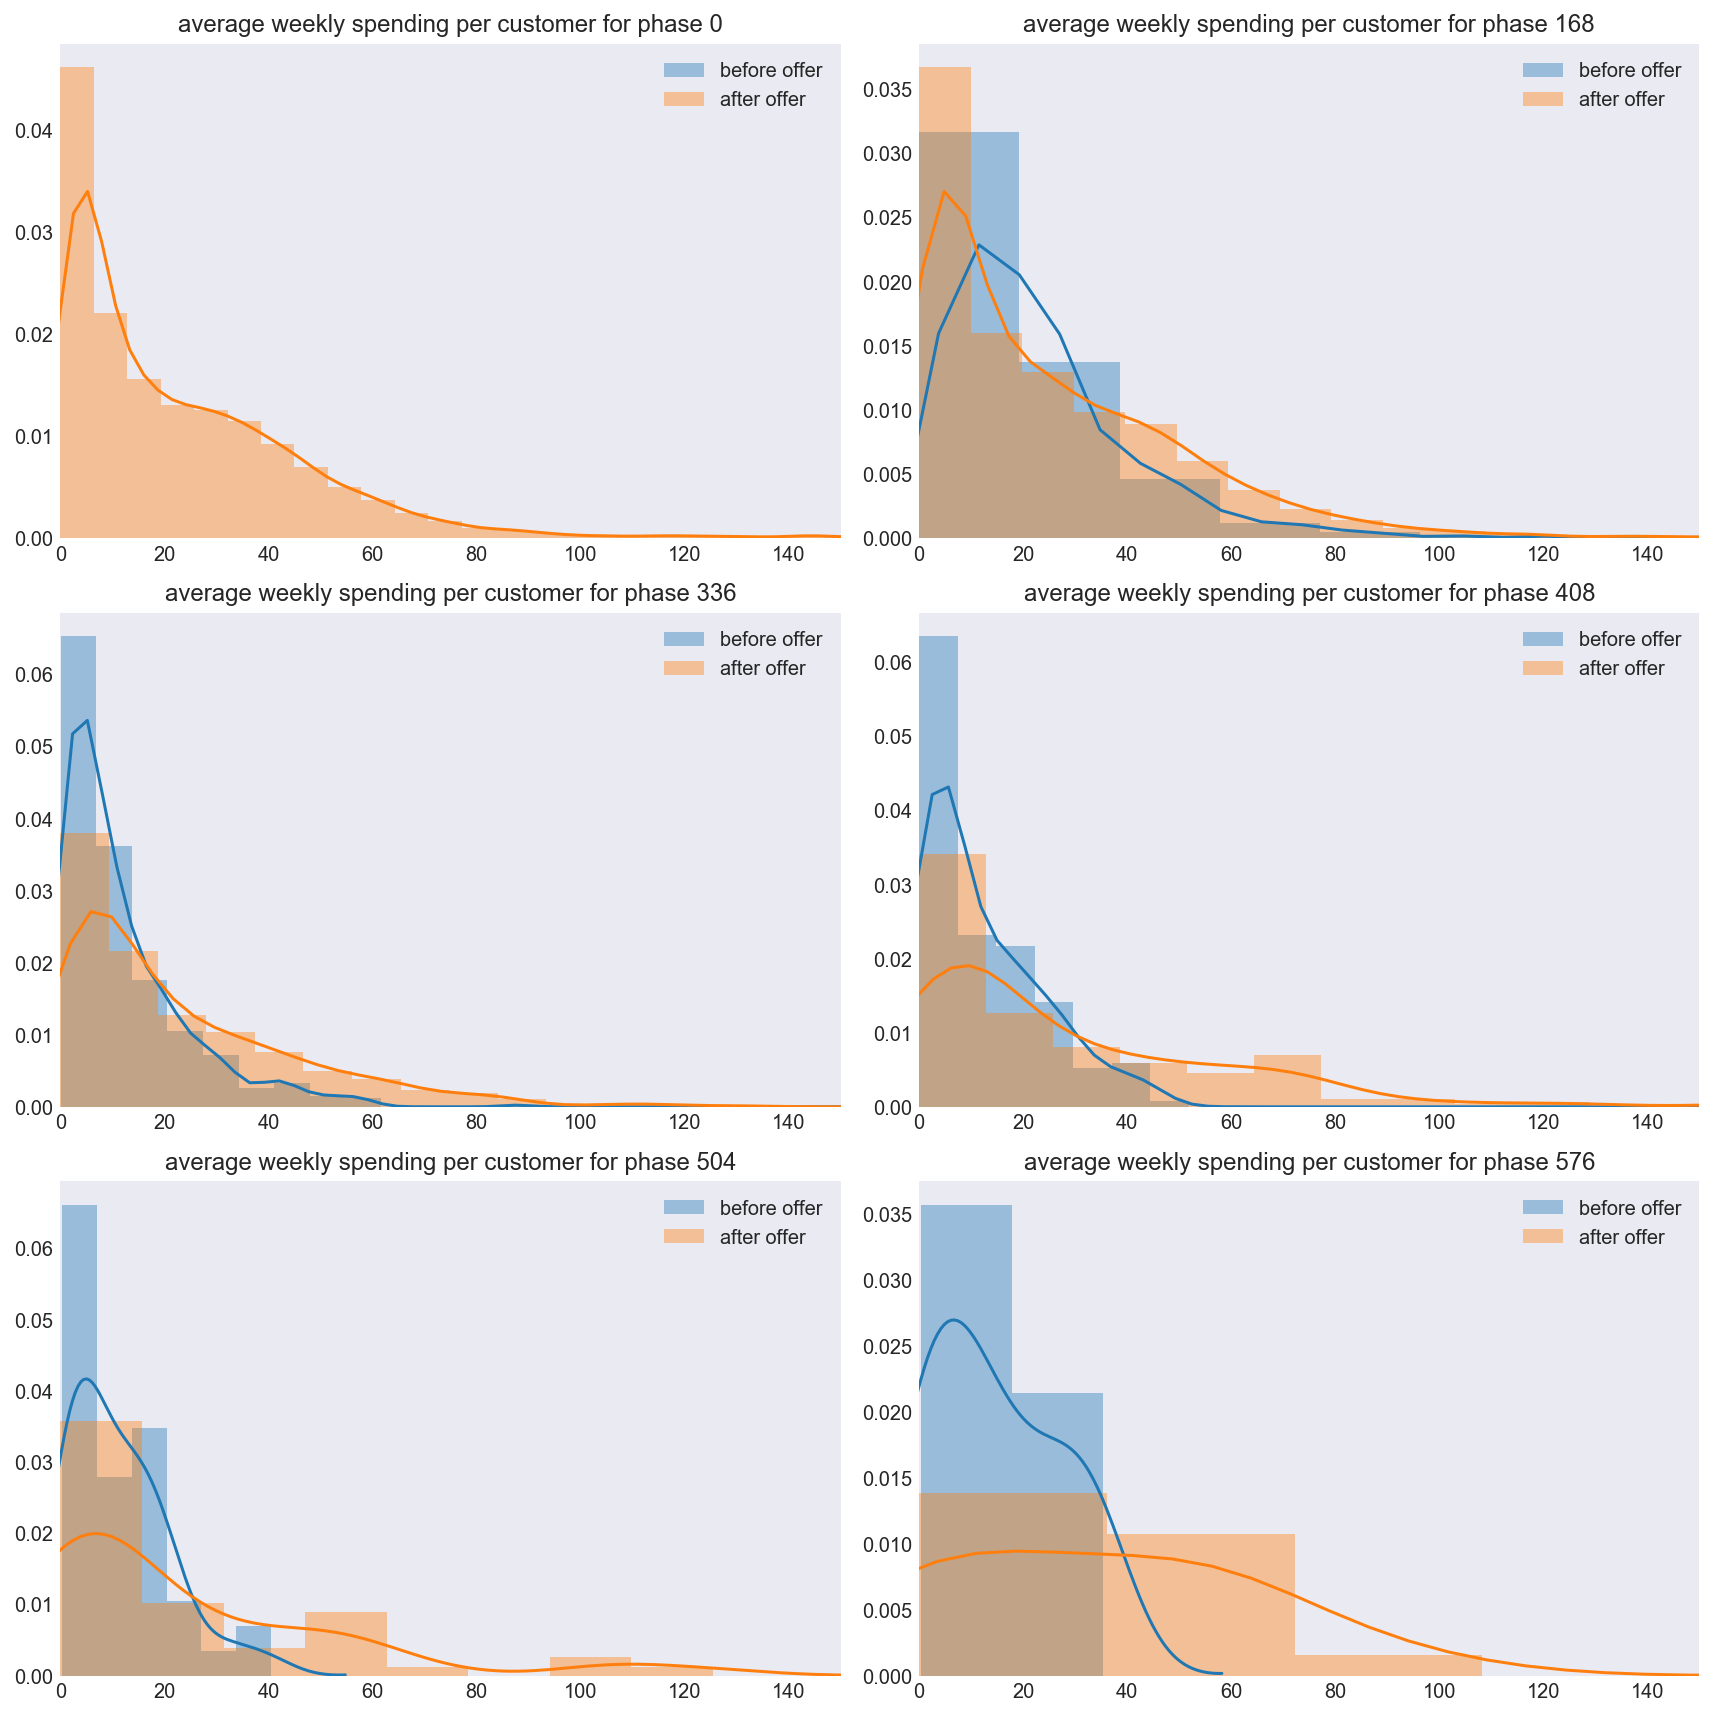

In [33]:
plt.figure(figsize=(12,12))
for i,phase in enumerate(time_of_phases):

    plt.subplot(3,2,i+1)

    pre_phase, post_phase = create_pre_post_events(phase)
    sns.distplot(pre_phase.groupby('customer_id').amount_spent.sum() / (phase/24/7), label='before offer');
    sns.distplot(post_phase.groupby('customer_id').amount_spent.sum() / ((max(post_phase.hour) - phase) /24/7), label='after offer');
    plt.title(f'average weekly spending per customer for phase {phase}')
    plt.xlabel('')
    plt.legend()
    plt.xlim(0,150)
    plt.tight_layout()

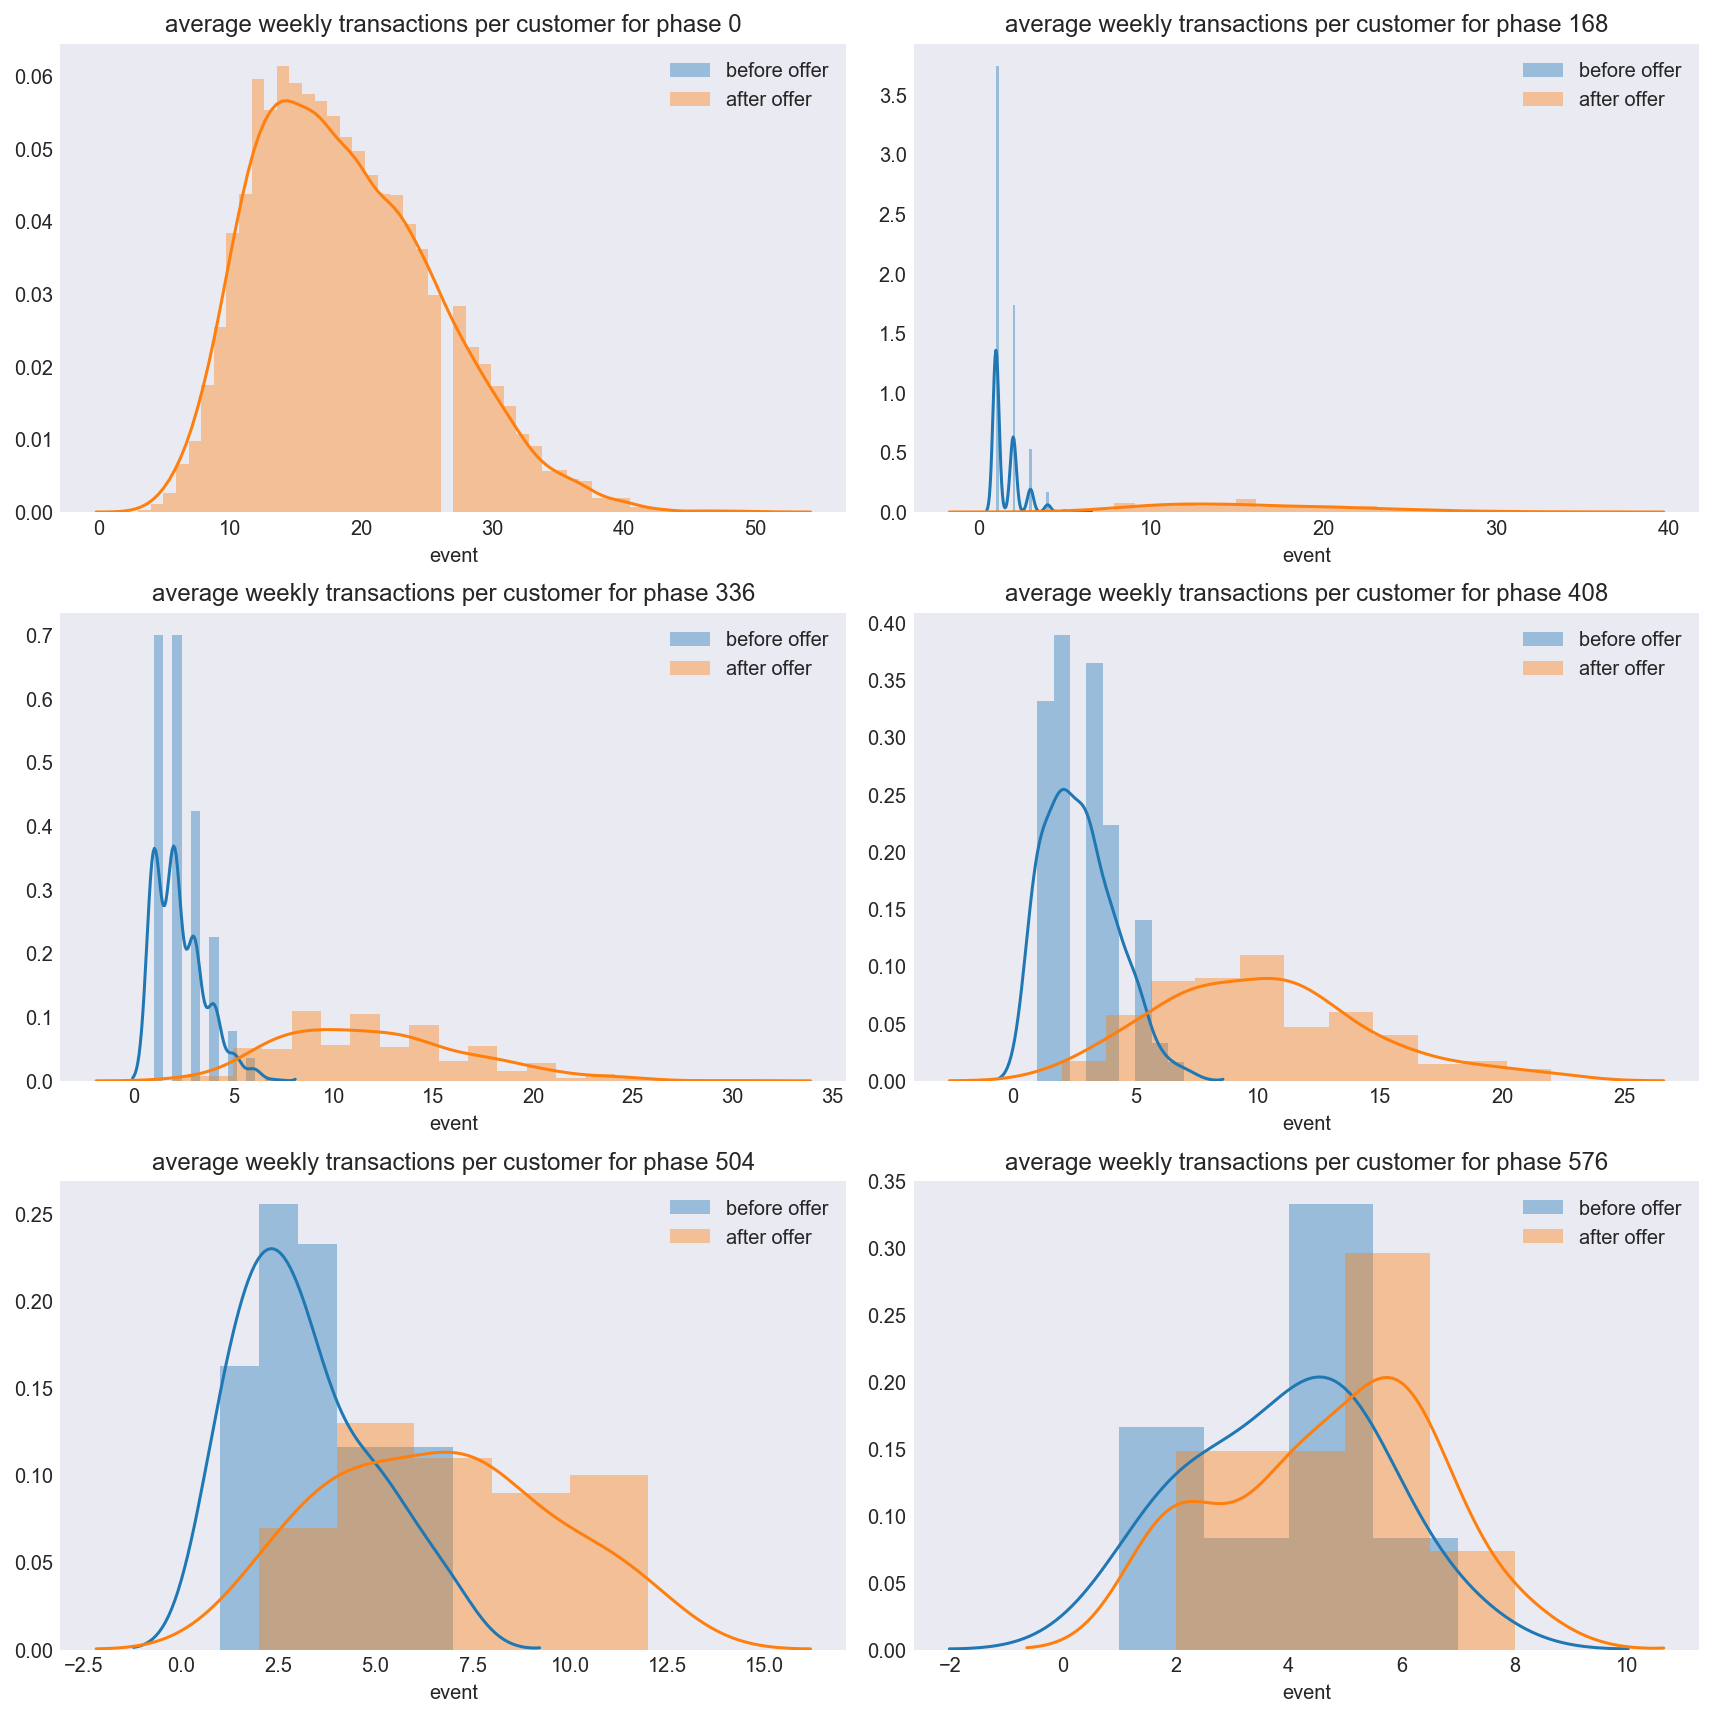

In [42]:
plt.figure(figsize=(12,12))
for i,phase in enumerate(time_of_phases):

    plt.subplot(3,2,i+1)

    pre_phase, post_phase = create_pre_post_events(phase)
    sns.distplot(pre_phase.groupby('customer_id').event.count(), label='before offer');
    sns.distplot(post_phase.groupby('customer_id').event.count(), label='after offer');
    plt.title(f'average weekly transactions per customer for phase {phase}')
    plt.legend()
    plt.tight_layout()

In [23]:
# def create_pre_post_offer_events(time_of_phases=time_of_phases):

#     '''
#     INPUT:
#         time_of_phases - 6 disctinct hours customers received 1st offer
#     OUTPUT:
#         pre_offer_events - customer events before everyone received the first offer
#         post_offer_events - customer events after everyone received the first offer
#     '''

#     pre_offer_events = pd.DataFrame()
#     current = pd.DataFrame()

#     for hour in time_of_phases:
#         current = events[events.customer_id.isin(get_phase_ids(hour))]
#         current['first_offer_hour'] = hour
#         current = current[current.hour < hour]
#         pre_offer_events = pd.concat([pre_offer_events, current])

    
#     post_offer_events = pd.DataFrame()
#     current = pd.DataFrame()

#     for hour in time_of_phases:
#         current = events[events.customer_id.isin(get_phase_ids(hour))]
#         current['first_offer_hour'] = hour
#         current = current[current.hour >= hour]
#         post_offer_events = pd.concat([post_offer_events, current])


#     # check the quality of data wrangling
#     assert list(pre_offer_events.event.unique()) == ['transaction']
#     assert list(post_offer_events.event.unique()) == ['offer received', 'offer viewed', 'transaction', 'offer completed']
#     assert len(pre_offer_events) + len(post_offer_events) == len(events), [len(pre_offer_events) + len(post_offer_events), len(events)]

#     return pre_offer_events, post_offer_events

# pre_offer_events, post_offer_events = create_pre_post_offer_events()

### Compare the same 2595 customers events pre and post first offer
**Metrics:**
- average amount spent per week (total amount / weeks)
- average transactions per week (total transactions / weeks)

In [45]:
# # Only 2595 customers who didn't get first offer 0 hours from test
# pre_offer_events['week'] = (pre_offer_events.first_offer_hour /24/7).astype(int)
# print(f'{pre_offer_events.customer_id.nunique()} unique customers in pre_offer_events')
# print(f'type of events: {pre_offer_events.event.unique()}')
# pre_offer_events.sample(5)

In [43]:
# # There are 16994 unique customers in post_offer_events
# print(f'{post_offer_events.customer_id.nunique()} unique customers in post_offer_events before filtering')

# # Filter post_offer_events with the same 2595 customers
# post_offer_events = post_offer_events[post_offer_events.customer_id.isin(pre_offer_events.customer_id.unique())]
# post_offer_events['week'] = (post_offer_events.first_offer_hour/24/7).astype(int)
# print(f'{post_offer_events.customer_id.nunique()} unique customers in post_offer_events')
# print(f'type of events: {post_offer_events.event.unique()}')

In [84]:
# sns.distplot(pre_offer_events.groupby('customer_id').amount_spent.sum()/4, label='before 1st offer');
# sns.distplot(post_offer_events.groupby('customer_id').amount_spent.sum()/4, label='after 1st offer');
# plt.legend(); plt.xlabel(''); plt.xlim(0,100);
# plt.title('weekly spending per customer');
# plt.tight_layout()

In [44]:
# plt.figure(figsize=(16,6))
# plt.subplot(1,2,1)
# sns.countplot(pre_offer_events.groupby(['customer_id']).event.count(),palette=("Blues_d"));
# plt.xlabel('transactions'); plt.title('weekly transactions before 1st offer')
# plt.subplot(1,2,2)
# sns.countplot(post_offer_events.groupby(['customer_id']).event.count(),palette=("Blues_d"));
# plt.xlabel('transactions'); plt.title('weekly transactions after 1st offer')
# plt.tight_layout()